# Proyecto 6: Sistemas de recomendación

## Dataset

El dataset que vamos a usar en este proyecto es el del proyecto [MovieLens](http://grouplens.org/datasets/movielens/). Estos son relevados por el grupo de investigación GroupLens de la Universidad de Minnesota. Vamos a usar la versión 100K.

Está basado en un sistema de rating de 5 estrellas y texto libre para tags a partir del servicio de recomendaciones MovieLens. Contiene 100.000 ratings para 1.682 películas. Los datos fueron creados por 943 usuarios.

En el [Readme](http://files.grouplens.org/datasets/movielens/ml-100k-README.txt) del dataset se puede encontrar información adicional. A continuación vamos a describir cada uno de ellos.

### Ratings (u.data)

Cada línea representa el rating para una película para un usuario. Los ratings están basados en un sistema de 5 estrellas, con una salto de 0.5 estrellas. Los timestamps están expresados en segundos desde la medianoche de 01/1970 (UTC). El formato es:

`user id | item id | rating | timestamp`

### Usuarios (u.users)

Cada línea del archivo representa un usuario. Se incluye información demográfica. El formato es:

`user id | age | gender | occupation | zip code`

### Películas (u.item)

Cada línea corresponde a una película. Puede haber inconsistencias en los nombres. El formato es:

`movie id | movie title | release date | video release date | IMDb URL | generos`



Las columnas con los generos son binarias indicando la presencia o ausencia de cada uno en la película. Los géneros pueden ser:

* Action
* Adventure
* Animation
* Children's
* Comedy
* Crime
* Documentary
* Drama
* Fantasy
* Film-Noir
* Horror
* Musical
* Mystery
* Romance
* Sci-Fi
* Thriller
* War
* Western
* unknown

## Experimentación

Durante todo este proyecto vamos a utilizar la librería `surprise` para llevar a cabo las experimentaciones.

Como se mencionó en clase, las implementaciones en esta librería tiene algunas mejoras respecto de las estrategias convencionales como SVD. Esto se traduce en una mayor cantidad de parámetros para optimizar.

Vamos a levantar los datos. En primer lugar, definamos el formato para poder leer los datos.

**1) Utilizar** el `Reader` con el parámetro `line_format` igual a `'user item rating timestamp'` y `sep` como `'\t'`. Guardarlo en una variable `reader`.

In [29]:
from surprise import Dataset
from surprise import Reader

Utilizando este `reader` cargar los datos:

In [30]:
reader=Reader(line_format='user item rating timestamp', sep='\t')

In [31]:
data = Dataset.load_from_file('./dataset/ml-100k/u.data', reader=reader)

In [32]:
data

__2) Ejecutar una corrida inicial usando cross validation y el algoritmo SVD (5 folds). Imprimir los RMSE de testing.__

In [1]:
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise.model_selection import cross_validate

In [34]:
svd=SVD()
cv=cross_validate(svd, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9353  0.9375  0.9289  0.9382  0.9378  0.9356  0.0035  
Fit time          3.35    3.33    3.35    3.35    3.42    3.36    0.03    
Test time         0.17    0.17    0.10    0.16    0.10    0.14    0.03    


In [35]:
print(cv['test_rmse'])

[0.93534074 0.93754397 0.92888138 0.93823588 0.93777267]


__3) Evaluar el RMSE (promedio de cross validation) de testing de acuerdo a la cantidad de factores en SVD.__

In [36]:
import numpy as np

rmse_test_means=[]
factores=[1,2,4,8,16,32,64,128,256]

for factor in factores:
    print(factor)
    svd=SVD(n_factors=factor)
    cv=cross_validate(svd, data, measures=['RMSE'], cv=5, verbose=True)
    rmse_test_means.append(np.mean(cv['test_rmse']))

1
Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9365  0.9465  0.9457  0.9374  0.9407  0.9414  0.0041  
Fit time          0.95    0.96    0.96    0.96    0.95    0.96    0.00    
Test time         0.10    0.19    0.10    0.10    0.15    0.13    0.04    
2
Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9378  0.9381  0.9455  0.9359  0.9355  0.9386  0.0036  
Fit time          0.99    0.98    0.98    0.98    0.99    0.99    0.00    
Test time         0.10    0.10    0.16    0.10    0.15    0.12    0.03    
4
Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9304  0.9324  0.9436  0.9467  0.9401  0.9386  0.0063  
Fit time          1.01    1.03    1.03    1.02    1.02    1.02    0.01    
Test time         0.16

__4) Graficar los promedios RMSE del conjunto de testing de acuerdo a la cantidad de factores en SVD.__

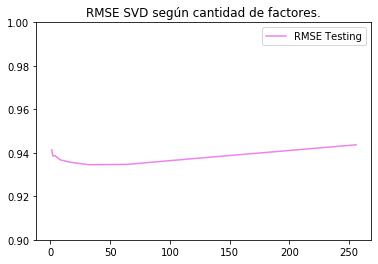

In [37]:
import matplotlib.pyplot as plt

%matplotlib inline 
plt.plot(factores, rmse_test_means, label='RMSE Testing', color='violet', marker=None)
plt.ylim((0.90, 1.0))
plt.legend(loc="best")
plt.title("RMSE SVD según cantidad de factores.")
plt.show()

__5) Usando GridSearch, encontrar el mejor estimador usando SVD con 500 factores. Imprimir el mejor rmse. Utilizar `refit` para obtener obtener el mejor estimador ya ajustado como resultado.__

Utilizar el espacio de parámetros:
* n_epochs: [5, 10]
* lr_all: [0.002, 0.005]
* reg_all: [0.4, 0.6]


In [38]:
from surprise.model_selection import GridSearchCV

param_grid={'n_factors':[500],'n_epochs':[5,10,20], 'lr_all':[0.005], 'reg_all':[0.02, 0.2]}
gs=GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5, n_jobs = -1, refit=True)
gs.fit(data)

In [39]:
print(gs.best_params['rmse'])

{'n_factors': 500, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.2}


In [40]:
print(gs.best_score['rmse'])

0.9456136901571977


__6) Obtener una predicción para el usuario 321 para la película Titanic.__

In [41]:
import pandas as pd

In [42]:
n_cols=['item', 'title', 'release_date', 'video_release_date', 'imdb_url', 'generos']
df_item=pd.read_csv('./dataset/ml-100k/u.item', sep='|', names=n_cols, usecols=range(6), encoding='ISO-8859-1')
df_item.head()

,item,title,release_date,video_release_date,imdb_url,generos
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0


In [43]:
df_item[df_item['title'].str.contains('Titanic')]

,item,title,release_date,video_release_date,imdb_url,generos
312,313,Titanic (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-12...,0


In [44]:
gs.predict(str(321),str(313))

Prediction(uid='321', iid='313', r_ui=None, est=4.0135688669363905, details={'was_impossible': False})

__7) Desarrollar una función que dado un usuario, obtenga la mejor predicción disponible (de acuerdo a nuestros datos de películas).__

In [144]:
n_cols=['user', 'item', 'rating']
data=pd.read_csv('./dataset/ml-100k/u.data', sep='\t', names=n_cols, usecols=range(3))
data.head()

,user,item,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [146]:
df_movies=pd.merge(data, df_item, on='item', how='left')
df_movies.head()

,user,item,rating,title,release_date,video_release_date,imdb_url,generos
0,196,242,3,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0
1,186,302,3,L.A. Confidential (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0
2,22,377,1,Heavyweights (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Heavyweights%...,0
3,244,51,2,Legends of the Fall (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Legends%20of%...,0
4,166,346,1,Jackie Brown (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0


In [147]:
df_movies.drop(['release_date', 'video_release_date', 'imdb_url', 'generos'], axis=1, inplace=True)
df_movies.head()

,user,item,rating,title
0,196,242,3,Kolya (1996)
1,186,302,3,L.A. Confidential (1997)
2,22,377,1,Heavyweights (1994)
3,244,51,2,Legends of the Fall (1994)
4,166,346,1,Jackie Brown (1997)


In [148]:
def recomendation (user):
    
    #selecciono los items que el usuario no vio
    predict_movies=df_movies[df_movies['user']!=user]
    
    #predicción de ratings sobre los items que no vio
    predict_movies['estimate_rating']=df_movies['item'].apply(lambda x: gs.predict(str(user), str(x)).est)

    return predict_movies

In [149]:
#llamo a la función y devuelvo en un DataFrame el mejor item predicho para el usuario 196

df_recomendation=recomendation(196)
df_recomendation.sort_values(by='estimate_rating', ascending=False, inplace=True)
df_recomendation.head(1)

/home/gr/.conda/envs/tf-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/gr/.conda/envs/tf-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,user,item,rating,title,estimate_rating
81768,885,169,5,"Wrong Trousers, The (1993)",4.387434
